# 二分类模型度量
## 1. 混淆矩阵

In [2]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

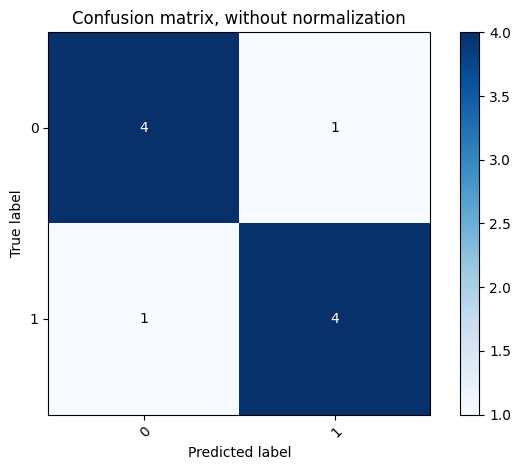

In [5]:
y_true=[1,1,1,1,1,0,0,0,0,0]
y_pre=[0,1,1,1,1,1,0,0,0,0]
class_name=np.array([0,1])
plot_confusion_matrix(y_true,y_pre,class_name)

## 

## 2. 准确率 Accuracy、精确率（查准率）Precision、召回率（查全率）Recall、F1值

In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_true = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
y_pred = [1, 1, 0, 1, 1, 0, 0, 0, 0, 0]
print("acc:", accuracy_score(y_true, y_pred))
print("p:", precision_score(y_true, y_pred))
print("r:", recall_score(y_true, y_pred))
print("f1:", f1_score(y_true, y_pred))

acc: 0.7
p: 0.5
r: 0.6666666666666666
f1: 0.5714285714285714
